In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns



In [2]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

In [3]:
df.head()

,Unnamed: 0,AAGE,AANCSTR1,AANCSTR2,AAUGMENT,ABIRTHPL,ACITIZEN,ACLASS,ADEPART,ADISABL1,...,TMPABSNT,TRAVTIME,VIETNAM,WEEK89,WORK89,WORKLWK,WWII,YEARSCH,YEARWRK,YRSSERV
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,52,1,2,0,11,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
2,2,0,0,0,0,0,0,0,0,0,...,3,0,0,0,2,2,0,9,6,0
3,3,0,0,0,0,1,0,0,1,0,...,0,10,0,24,1,1,0,8,1,0
4,4,0,0,0,0,0,0,0,0,0,...,3,0,0,0,2,2,0,11,4,0


In [4]:
df_demo = pd.DataFrame()

In [5]:
df_demo["AGE"] = df[["AGE"]].copy()
df_demo.head()

,AGE
0,39
1,13
2,71
3,16
4,63


In [6]:
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)
df_demo.head()

,AGE,INCOME
0,39,12790
1,13,0
2,71,3600
3,16,2724
4,63,3432


In [7]:
df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo.head()

,AGE,INCOME,YEARSCH
0,39,12790,11
1,13,0,5
2,71,3600,9
3,16,2724,8
4,63,3432,11


In [8]:
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo.head()

,AGE,INCOME,YEARSCH,ENGLISH
0,39,12790,11,0
1,13,0,5,0
2,71,3600,9,0
3,16,2724,8,0
4,63,3432,11,0


In [9]:
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo.head()

,AGE,INCOME,YEARSCH,ENGLISH,FERTIL
0,39,12790,11,0,3
1,13,0,5,0,0
2,71,3600,9,0,4
3,16,2724,8,0,0
4,63,3432,11,0,3


In [10]:
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()
df_demo.head()

,AGE,INCOME,YEARSCH,ENGLISH,FERTIL,YRSSERV
0,39,12790,11,0,3,0
1,13,0,5,0,0,0
2,71,3600,9,0,4,0
3,16,2724,8,0,0,0
4,63,3432,11,0,3,0


In [17]:
df_demo.columns

Index(['AGE', 'INCOME', 'YEARSCH', 'ENGLISH', 'FERTIL', 'YRSSERV'], dtype='object')

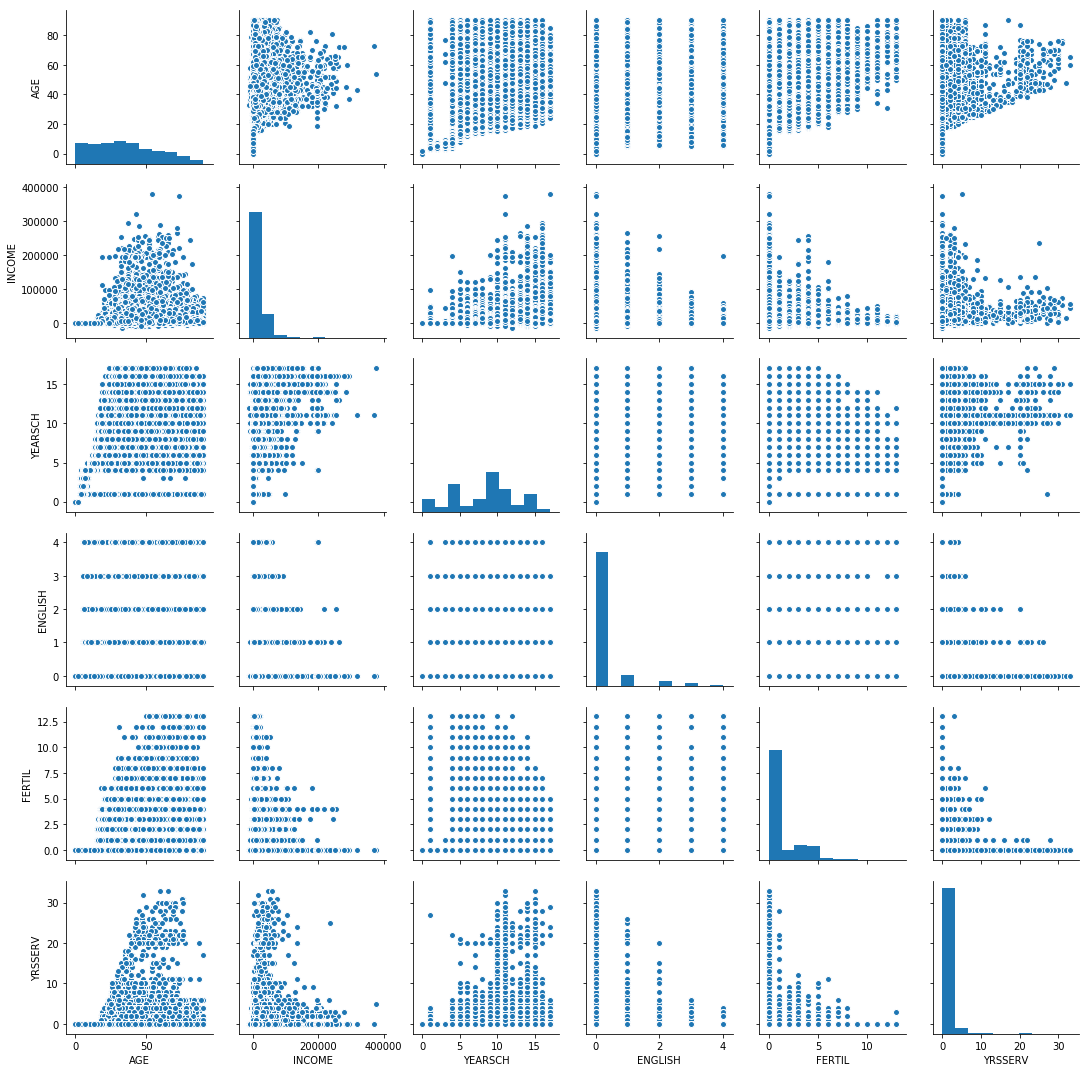

In [19]:
sns.pairplot(data=df_demo[['AGE', 'INCOME', 'YEARSCH', 'ENGLISH', 'FERTIL', 'YRSSERV']], dropna=True)

In [23]:
df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL"])
df_demo.head()

,AGE,INCOME,YEARSCH,YRSSERV,ENGLISH_0,ENGLISH_1,ENGLISH_2,ENGLISH_3,ENGLISH_4,FERTIL_0,...,FERTIL_4,FERTIL_5,FERTIL_6,FERTIL_7,FERTIL_8,FERTIL_9,FERTIL_10,FERTIL_11,FERTIL_12,FERTIL_13
0,39,12790,11,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,0,5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,71,3600,9,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,16,2724,8,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,63,3432,11,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_demo.head()

,AGE,INCOME,YEARSCH,YRSSERV,ENGLISH_0,ENGLISH_1,ENGLISH_2,ENGLISH_3,ENGLISH_4,FERTIL_0,...,FERTIL_4,FERTIL_5,FERTIL_6,FERTIL_7,FERTIL_8,FERTIL_9,FERTIL_10,FERTIL_11,FERTIL_12,FERTIL_13
0,39,12790,11,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,0,5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,71,3600,9,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,16,2724,8,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,63,3432,11,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Number of clusters: 2
Silhouette Coefficient: 0.242


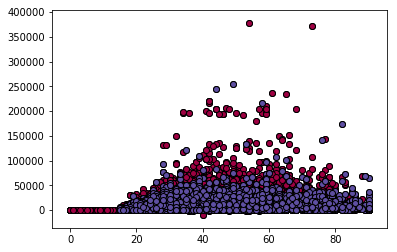

In [33]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 2

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Number of clusters: 3
Silhouette Coefficient: 0.151


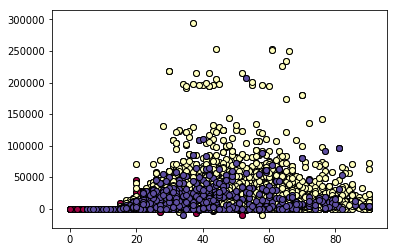

In [32]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 3

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Number of clusters: 4
Silhouette Coefficient: 0.211


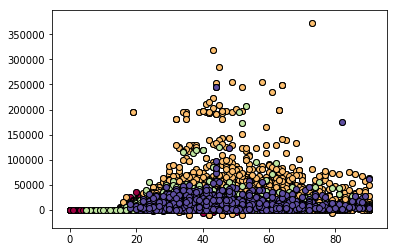

In [31]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 4

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Number of clusters: 7
Silhouette Coefficient: 0.295


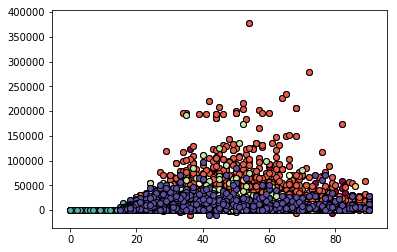

In [36]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 7

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Number of clusters: 10
Silhouette Coefficient: 0.403


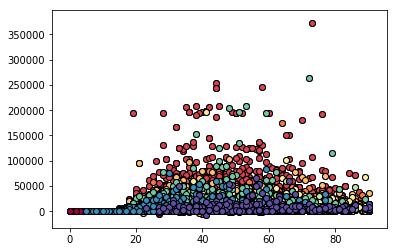

In [37]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 10

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
